## Text analysis

In [23]:
import pickle as pkl
import matplotlib.pyplot as plt
import random
from random import sample 
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
# load data
with open('tmp.pickle', 'rb') as f:
    tmp = pkl.load(f)

In [3]:
flair_list = ["enfj","enfp","entj","entp","esfj","esfp","estj","estp","infj","infp","intj","intp","isfj","isfp","istj","istp"]

In [4]:
print(flair_list)

['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp', 'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp']


In [5]:
#Maybe see https://pypi.org/project/lexical-diversity/

def lexical_diversity(text):
    sampled = text[0:2000]
    return len(set(sampled)) / len(sampled)

In [6]:
for t in tmp:
    print(len(t))

324391
159184
12010
57443
2303
42910
271636
143481
151887
190997
95544
34104
66645
85108
333391
576033


Lexical Diversity of enfj: 0.493
Lexical Diversity of enfp: 0.5185
Lexical Diversity of entj: 0.522
Lexical Diversity of entp: 0.5565
Lexical Diversity of esfj: 0.449
Lexical Diversity of esfp: 0.5105
Lexical Diversity of estj: 0.4245
Lexical Diversity of estp: 0.52
Lexical Diversity of infj: 0.494
Lexical Diversity of infp: 0.5265
Lexical Diversity of intj: 0.5025
Lexical Diversity of intp: 0.4245
Lexical Diversity of isfj: 0.5305
Lexical Diversity of isfp: 0.48
Lexical Diversity of istj: 0.579
Lexical Diversity of istp: 0.513


<BarContainer object of 16 artists>

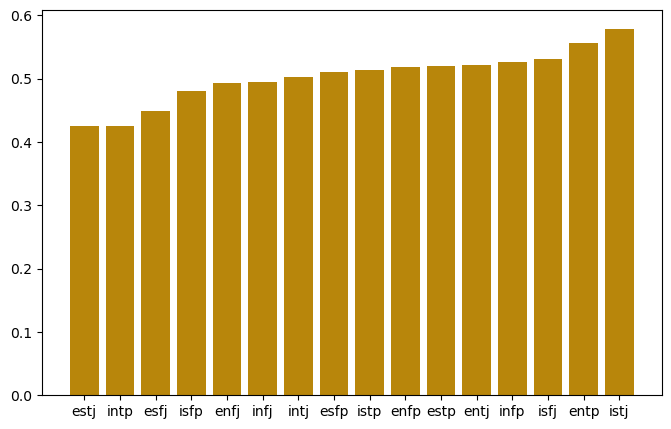

In [21]:
# lexical diversity of each flair
lexical_diversity_list = [0]*len(tmp)
for i in range(len(tmp)):
    lexical_diversity_list[i] = lexical_diversity(tmp[i])
    print('Lexical Diversity of',flair_list[i] + ':',lexical_diversity_list[i])

# sort lexical diversity and flair list
lexical_diversity_list, tmp_flair_list = zip(*sorted(zip(lexical_diversity_list, flair_list)))

# bar plot over lexical diversity of each flair sorted from highest to lowest
plt.figure(figsize=(8,5))
plt.bar(tmp_flair_list, lexical_diversity_list, color='darkgoldenrod')

# Sentiment analysis

In [10]:
sentiment_frame=pd.read_csv("sentiment.txt",index_col=0,sep="\t")
sentiment_dict=sentiment_frame.to_dict()["happiness_average"]

def calculate_sentiment(text, sentiment_dict):
    sentiment = []
    for word in text:
        if word in sentiment_dict:
            sentiment.append(sentiment_dict[word])
    return sentiment

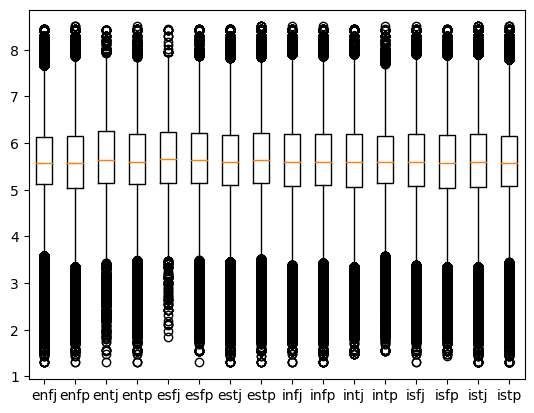

In [13]:
# Sentiment of each flair
sentiment_list = [0]*len(tmp)
for i in range(len(tmp)):
    sentiment_list[i] = calculate_sentiment(tmp[i],sentiment_dict)
    #print('Sentiment of',flair_list[i] + ':',sentiment_list[i])

plt.boxplot(sentiment_list, labels=flair_list)
plt.show()

Sentiment of enfj: 4.312668754681493
Sentiment of enfp: 4.47314139612029
Sentiment of entj: 4.576834304745988
Sentiment of entp: 4.546151837473796
Sentiment of esfj: 4.720178028658273
Sentiment of esfp: 4.63257236075516
Sentiment of estj: 4.436863191918676
Sentiment of estp: 4.4517086582891645
Sentiment of infj: 4.50365923350918
Sentiment of infp: 4.415850091886311
Sentiment of intj: 4.5070295361300605
Sentiment of intp: 4.475197337555711
Sentiment of isfj: 4.3988137144573765
Sentiment of isfp: 4.468664990365172
Sentiment of istj: 4.445375160096582
Sentiment of istp: 4.447651384556672


<BarContainer object of 16 artists>

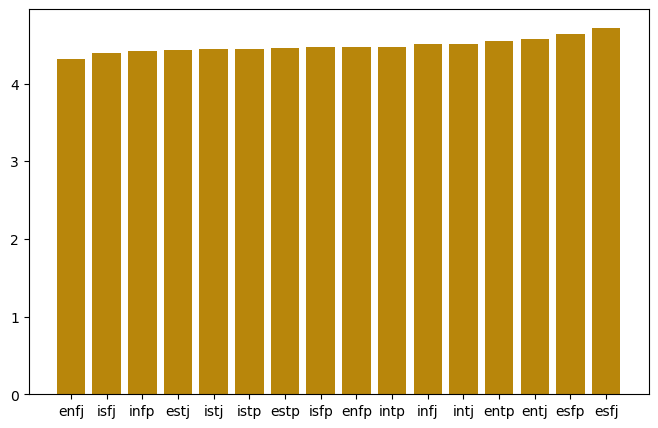

In [18]:
def calculate_sentiment(text, sentiment_dict):
    sentiment = 0
    for word in text:
        if word in sentiment_dict:
            sentiment +=sentiment_dict[word]
    return sentiment/len(text)

# Sentiment of each flair
sentiment_list = [0]*len(tmp)
for i in range(len(tmp)):
    sentiment_list[i] = calculate_sentiment(tmp[i],sentiment_dict)
    print('Sentiment of',flair_list[i] + ':',sentiment_list[i])

# sort lexical diversity and flair list
sentiment_list, tmp_flair_list = zip(*sorted(zip(sentiment_list, flair_list)))

# bar plot over lexical diversity of each flair sorted from highest to lowest
plt.figure(figsize=(8,5))
plt.bar(tmp_flair_list, sentiment_list, color='darkgoldenrod')

Sentiment of enfj: 5.580205220457427
Sentiment of enfp: 5.551547145686175
Sentiment of entj: 5.64814837648993
Sentiment of entp: 5.591243095105553
Sentiment of esfj: 5.679503657262278
Sentiment of esfp: 5.636854671770878
Sentiment of estj: 5.580846796786367
Sentiment of estp: 5.6309008762804815
Sentiment of infj: 5.594655101907286
Sentiment of infp: 5.600880028687927
Sentiment of intj: 5.590066984279464
Sentiment of intp: 5.592192950315111
Sentiment of isfj: 5.5838734500295235
Sentiment of isfp: 5.547002610737571
Sentiment of istj: 5.585489015938101
Sentiment of istp: 5.552532389848509


<BarContainer object of 16 artists>

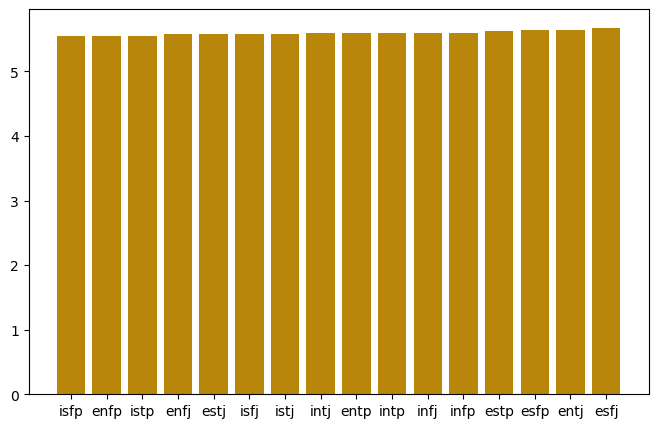

In [20]:
def calculate_sentiment(text, sentiment_dict):
    sentiment = []
    for word in text:
        if word in sentiment_dict:
            sentiment.append(sentiment_dict[word])
    return np.mean(sentiment)

# Sentiment of each flair
sentiment_list = [0]*len(tmp)
for i in range(len(tmp)):
    sentiment_list[i] = calculate_sentiment(tmp[i],sentiment_dict)
    print('Sentiment of',flair_list[i] + ':',sentiment_list[i])

# sort lexical diversity and flair list
sentiment_list, tmp_flair_list = zip(*sorted(zip(sentiment_list, flair_list)))

# bar plot over lexical diversity of each flair sorted from highest to lowest
plt.figure(figsize=(8,5))
plt.bar(tmp_flair_list, sentiment_list, color='darkgoldenrod')